### Course talk scrapped data analysis

In [37]:
import pandas as pd
import numpy as np
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import re, string, timeit
import pickle
%matplotlib inline

pd.set_option('max_colwidth', 800)

In [38]:
directory = '/Users/chidam/data_sci/data/capstone/'
file_name = 'Coursetalk_Scraped_Data.csv'
inp_file = directory + file_name
in_file = pd.read_csv(inp_file)
filtered_df = in_file[in_file['course_rating']>0]  # dropped 35,790 courses with 0 ratinng. picked only 17.5% courses

In [39]:
print(filtered_df.info())
print(filtered_df.head())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7623 entries, 0 to 7629
Data columns (total 10 columns):
course_instructor    7539 non-null object
course_name          7623 non-null object
course_rating        7623 non-null int64
course_university    1130 non-null object
course_category      0 non-null float64
course_desc          7622 non-null object
course_url           7623 non-null object
course_provider      7623 non-null object
course_price         7623 non-null object
course_review_num    7623 non-null object
dtypes: float64(1), int64(1), object(8)
memory usage: 655.1+ KB
None
                                                                                                                          course_instructor  \
0  Andrew J. Friedland, Michael Goudzwaard, Justin Richardson, R. Michael Murray, Sawyer Broadley ‘08, Joby Bernstein ’17, Chloe Madill ‘17   
1                                                                                                                        

In [40]:
exclude = set(string.punctuation) - {'+','#'}

In [41]:
## Removing punctuations ##
def remove_punct(str1):
    return(''.join(ch for ch in str1 if ch not in exclude))
    #return(''.join(ch for ch in str if (ch not in exclude) and (not ch.isdigit())))

In [42]:
stop_words = set(stopwords.words("english"))
course_desc = filtered_df.course_desc
course_names = filtered_df.course_name
course_ratings = filtered_df.course_rating

In [43]:
## Bag_of_words

def bag_of_words(dictionary_with_count,dictionary_ref, document, course_name):
    words = word_tokenize(document)
    for w in words:
        if w not in stop_words:
            if w not in dictionary_with_count.keys():
                dictionary_with_count[w] = 1
                dictionary_ref[w] = [course_name]
            else:
                dictionary_with_count[w] += 1
                dictionary_ref[w].append(course_name)
    return dictionary_with_count , dictionary_ref

In [44]:
print(course_names[0:10])
#print(course_desc[0:10])

0                                       Introduction to Environmental Science
1                                    Design: Creation of Artifacts in Society
2                How I Make $4000 A Week From Udemy Courses With No Marketing
3                                                           JavaScript Basics
4                        An Introduction to Interactive Programming in Python
5                                             The Science of the Solar System
6                             Accounting in 60 Minutes - A Brief Introduction
7                                            The Science of Everyday Thinking
8    The Complete iOS8 and Swift Course: Learn by Building 15 Real World Apps
9                       The Complete Web Developer Course - Build 14 Websites
Name: course_name, dtype: object


In [45]:
## Modified processing
dict_course_names = {}
dict_course_ref = {}
course_list = []
for index, i in enumerate(zip(course_names, course_ratings),start = 0):
    print("Processing {}, {}...".format(index, i))
    try:
        course_list.append(remove_punct(str(course_names[index].lower())))
        dict_course_names, dict_course_ref = bag_of_words(dict_course_names, dict_course_ref, remove_punct(course_names[index].lower()), i)
    except: course_list.append(None)

Processing 0, ('Introduction to Environmental Science', 10)...
Processing 1, ('Design: Creation of Artifacts in Society', 10)...
Processing 2, ('How I Make $4000 A Week From Udemy Courses With No Marketing', 10)...
Processing 3, ('JavaScript Basics', 10)...
Processing 4, ('An Introduction to Interactive Programming in Python', 10)...
Processing 5, ('The Science of the Solar System', 10)...
Processing 6, ('Accounting in 60 Minutes - A Brief Introduction', 10)...
Processing 7, ('The Science of Everyday Thinking', 10)...
Processing 8, ('The Complete iOS8 and Swift Course: Learn by Building 15 Real World Apps', 10)...
Processing 9, ('The Complete Web Developer Course - Build 14 Websites', 10)...
Processing 10, ('Create amazing videos that mesmerize your viewers instantly!', 10)...
Processing 11, ('Learn Photoshop, Web Design & Profitable Freelancing', 10)...
Processing 12, ('Becoming A Writer', 10)...
Processing 13, ('The Million Dollar Screenwriter!', 10)...
Processing 14, ('Excel Best Pr

In [46]:
print(dict_course_names)  # dictionary with words with count
print(dict_course_ref)    # dictionary with words with (course name, course rating)

## pickling the dictionaries for future use

##with open('dict_course_names.pickle', 'wb') as handle:
##  pickle.dump(dict_course_names, handle)

##with open('dict_course_ref.pickle', 'wb') as handle:
##  pickle.dump(dict_course_ref, handle)


{'nina': 1, 'force': 1, 'running': 7, 'auditor': 2, 'convincer': 1, 'southern': 1, 'negócios': 2, 'simplified': 7, 'leads': 11, 'ibm': 2, 'handbook': 1, 'bass': 2, 'switched': 1, 'systematic': 4, 'malnutrition': 1, 'margins': 1, 'partie': 2, 'علِّم': 1, 'trends': 7, 'feeding': 1, 'scams': 1, '中国互联网金融实践': 1, 'wasters': 1, 'addressing': 1, 'working': 14, 'wall': 3, 'attack': 1, 'babysitter': 1, 'effortless': 3, 'bright': 1, '101': 54, 'מודעות': 1, 'italian': 9, 'onwards': 1, 'linguistics': 1, '66+': 1, 'stagefright': 1, 'tshirt': 1, 'screens': 1, 'mta': 2, 'within': 4, 'omnifocus': 1, 'dw': 1, 'psd': 7, 'hollywood': 5, 'appstore': 1, 'report': 3, 'dankbarkeit': 1, 'enthusiasts': 2, 'كهربائية': 1, 'ferramenta': 1, 'ndo': 1, 'deep': 6, 'smart': 14, 'bartending': 2, 'jsps': 1, 'coastal': 1, 'autoliderazgo': 1, 'investigations': 1, 'metaphor': 1, 'monday': 1, 'professionelle': 1, 'factoring': 1, 'scribus': 1, 'access': 26, 'listing': 1, 'zs': 1, 'cardiovascular': 1, 'reignite': 1, 'targetted

## Word cloud function

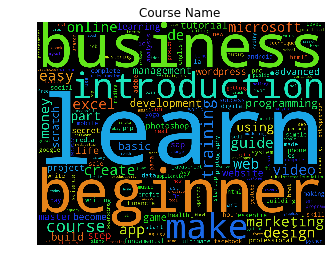

In [47]:
def word_cloud(input_string,title_name):
    wordcloud = WordCloud(
                      #font_path='/Users/Chidam/Library/Fonts/CabinSketch-Bold.ttf',
                      stopwords=STOPWORDS,
                      background_color='black',
                      width=1800,
                      height=1400
                     ).generate(input_string)

    plt.imshow(wordcloud)
    plt.axis('off')
    plt.savefig('./res_summary_wordcloud_1.png', dpi=300)
    plt.title(title_name)
    plt.show()
    

course_name_filtered = []
#course = course_list + course_desc
#for i in course_list+course_desc:
for i in course_list:
    if i is not None:
        course_name_filtered.append(str(i))
course_cloud_inp = ' '.join(course_name_filtered)
word_cloud(course_cloud_inp,'Course Name')

In [48]:
## Top keywords from the dictionary
Top_words = []
Top_words = sorted(dict_course_names.items(), key=lambda dict_course_names:-dict_course_names[1])[:3000]

In [49]:
len(dict_course_names)

7615

In [50]:
Top_words_list = []
Top_words_dict = {}
for (i,j) in Top_words:
    if i not in Top_words_dict:
        Top_words_dict[i] = dict_course_ref[i]
    Top_words_list.append(i)
    #print(i, nltk.pos_tag(i))

#words_pos = nltk.pos_tag(Top_words_list)
    
#print(words_pos)
print(Top_words_dict)

## One final dictionary with 
with open('Top_words_dict.pickle', 'wb') as handle:
  pickle.dump(Top_words_dict, handle)



{'ready': [('Get Relationship Ready - Attract and Meet the Perfect Love!', 10), ('HTML: Ready, Set, Go...', 9), ('Get Ready for Marriage!', 9), ('Learn Microsoft Excel by building real world ready documents', 9), ('Sane Parents Guide: Getting Your Home Ready for Baby', 7), ('Alcohol, Drugs, and Baby Boomers: Are you ready?', 7)], 'auditor': [('ISO 9001 QMS Auditor / Lead Auditor', 9), ('ISO 9001 QMS Auditor / Lead Auditor', 9)], 'death': [('Programmed cell death', 9), ('Philosophy 176: Death with Shelly Kagan', 9), ('Death 101: Shaping the Future of Global Health', 5)], 'running': [('Running A Web Design Business', 10), ('Introduction to Running Pipe in Oil and Gas Wells', 9), ('Running Lean Workshop', 9), ('Up And Running With Ruby On Rails', 9), ('Data Services : Up And Running In No Time', 9), ('Running A Dojo', 7), ('Running a Babysitting Business In-Depth', 5)], 'requirements': [('The Definitive Guide to Web Project Requirements Gathering', 10), ('Writing Better Requirements in Pl

In [51]:
# Testing to see if the pickled objects are read properly
with open('Top_words_dict.pickle', 'rb') as handle:
  b = pickle.load(handle)

print(b)

{'ready': [('Get Relationship Ready - Attract and Meet the Perfect Love!', 10), ('HTML: Ready, Set, Go...', 9), ('Get Ready for Marriage!', 9), ('Learn Microsoft Excel by building real world ready documents', 9), ('Sane Parents Guide: Getting Your Home Ready for Baby', 7), ('Alcohol, Drugs, and Baby Boomers: Are you ready?', 7)], 'auditor': [('ISO 9001 QMS Auditor / Lead Auditor', 9), ('ISO 9001 QMS Auditor / Lead Auditor', 9)], 'death': [('Programmed cell death', 9), ('Philosophy 176: Death with Shelly Kagan', 9), ('Death 101: Shaping the Future of Global Health', 5)], '2007': [('Excel 2007 Introduction', 9), ('Excel 2007 - Advanced', 9), ('Introductory Microsoft Project 2007', 9), ('Access 2007 Introduction', 9), ('Project 2007 Advanced', 9), ('SharePoint 2007 Introduction', 9), ('Word 2007 Introduction', 8), ('Project 2007 Introduction', 7), ('SharePoint 2007 Tutorial for Business Users', 5)], 'partie': [('Algèbre Linéaire (Partie 1)', 9), ('Algèbre Linéaire (Partie 3)', 6)], 'trade